# Ozone dependency on NOx

In [1]:
import seaborn as sns
import pandas as pd
import re
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np
import warnings

In [2]:
base_path = '/work/bd1063/b309253/test.csv'
data = pd.read_csv(base_path, sep='\t')

In [3]:
def unpack_simulation_data(data, sim_name):
    data = data[data['Sim'] == sim_name]
    data = data.set_index('category')
    data = data.drop(columns = 'Sim')
    return data[['Nox emissions (Tg NO)', 'O3/NOx [Tg]']]

In [4]:
data_2015 = unpack_simulation_data(data, '2015')
data_2050SSP1 = unpack_simulation_data(data, '2050SSP1')
data_2050SSP2 = unpack_simulation_data(data, '2050SSP2')
data_2050SSP3 = unpack_simulation_data(data, '2050SSP3')

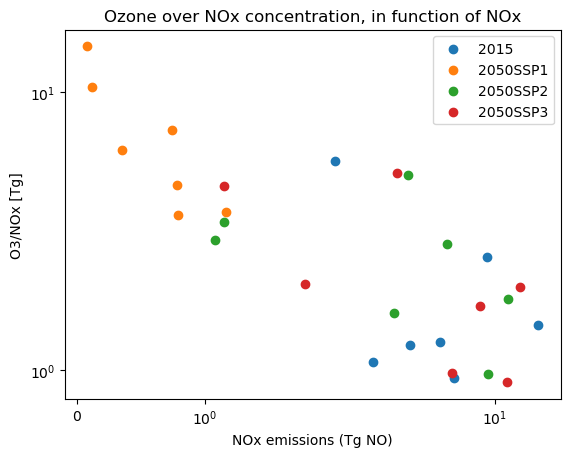

In [5]:
plt.scatter(data_2015['Nox emissions (Tg NO)'], data_2015['O3/NOx [Tg]'] )
plt.scatter(data_2050SSP1['Nox emissions (Tg NO)'], data_2050SSP1['O3/NOx [Tg]'] )
plt.scatter(data_2050SSP2['Nox emissions (Tg NO)'], data_2050SSP2['O3/NOx [Tg]'] )
plt.scatter(data_2050SSP3['Nox emissions (Tg NO)'], data_2050SSP3['O3/NOx [Tg]'] )

plt.legend(['2015', '2050SSP1', '2050SSP2', '2050SSP3' ])
plt.xscale('symlog')
plt.yscale('symlog')
plt.ylabel('O3/NOx [Tg]')
plt.xlabel('NOx emissions (Tg NO)')
plt.title('Ozone over NOx concentration, in function of NOx')
plt.show()

### Let's group by tag instead

In [8]:
def unpack_category_data(data, category):
    data = data[data['category'] == category]
    data = data.set_index('Sim')
    data = data.drop(columns = 'category')
    return data[['Nox emissions (Tg NO)', 'O3/NOx [Tg]']]

In [9]:
#data_new = data.sort_values(by=['O3/NOx [Tg]'])
data_new = data.sort_values(by=['Nox emissions (Tg NO)'])

data_tra = unpack_category_data(data_new, 'tra')
data_teu = unpack_category_data(data_new, 'teu')
data_tna = unpack_category_data(data_new, 'tna')
data_tea = unpack_category_data(data_new, 'tea')
data_tsa = unpack_category_data(data_new, 'tsa')
data_ship = unpack_category_data(data_new, 'ship')
data_aviation = unpack_category_data(data_new, 'aviation')

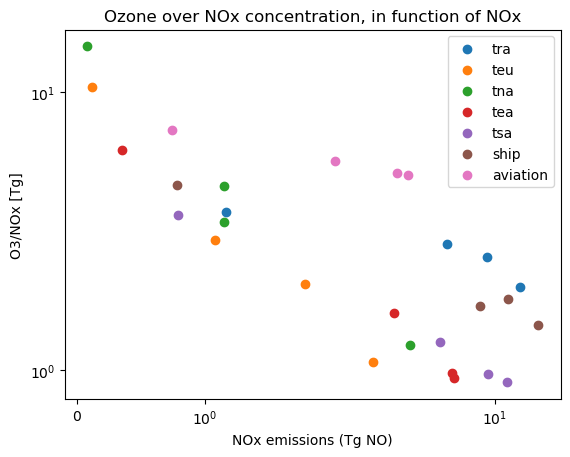

In [10]:
fig, ax = plt.subplots()

plt.scatter(data_tra['Nox emissions (Tg NO)'], data_tra['O3/NOx [Tg]'], label = 'tra')
plt.scatter(data_teu['Nox emissions (Tg NO)'], data_teu['O3/NOx [Tg]'], label = 'teu' )
plt.scatter(data_tna['Nox emissions (Tg NO)'], data_tna['O3/NOx [Tg]'], label = 'tna' )
plt.scatter(data_tea['Nox emissions (Tg NO)'], data_tea['O3/NOx [Tg]'], label = 'tea' )
plt.scatter(data_tsa['Nox emissions (Tg NO)'], data_tsa['O3/NOx [Tg]'], label = 'tsa' )
plt.scatter(data_ship['Nox emissions (Tg NO)'], data_ship['O3/NOx [Tg]'], label = 'ship' )
plt.scatter(data_aviation['Nox emissions (Tg NO)'], data_aviation['O3/NOx [Tg]'], label = 'aviation' )

plt.legend(['tra', 'teu', 'tna', 'tea', 'tsa', 'ship', 'aviation' ])
plt.ylabel('O3/NOx [Tg]')
plt.xlabel('NOx emissions (Tg NO)')
plt.title('Ozone over NOx concentration, in function of NOx')
plt.xscale('symlog')
plt.yscale('symlog')
plt.show()

# Grouping by scenario, connecting by tag

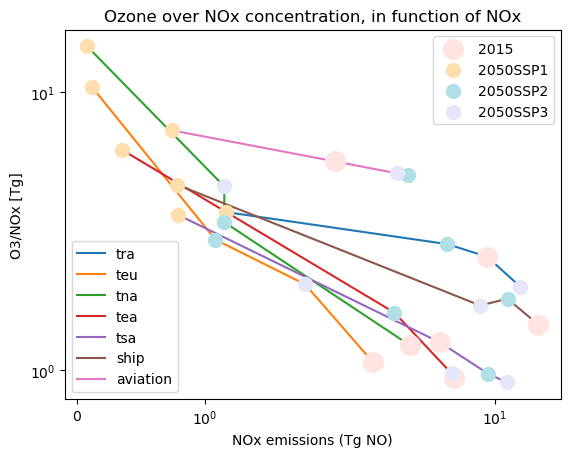

In [11]:
fig, ax = plt.subplots()

scatter_2015 = plt.scatter(data_2015['Nox emissions (Tg NO)'], data_2015['O3/NOx [Tg]'], label = '2015', s = 200, color = 'mistyrose', zorder=3)
scatter_2050ssp1 = plt.scatter(data_2050SSP1['Nox emissions (Tg NO)'], data_2050SSP1['O3/NOx [Tg]'], s = 100, color = 'navajowhite', label = '2050SSP1' , zorder=3)
scatter_2050ssp2 = plt.scatter(data_2050SSP2['Nox emissions (Tg NO)'], data_2050SSP2['O3/NOx [Tg]'], s = 100,  color = 'powderblue', label = '2050SSP2', zorder=3 )
scatter_2050ssp3 = plt.scatter(data_2050SSP3['Nox emissions (Tg NO)'], data_2050SSP3['O3/NOx [Tg]'], s = 100,  color = 'lavender', label = '2050SSP3' , zorder=3)

tra, = plt.plot(data_tra['Nox emissions (Tg NO)'], data_tra['O3/NOx [Tg]'], label = 'tra')
teu, = plt.plot(data_teu['Nox emissions (Tg NO)'], data_teu['O3/NOx [Tg]'], label = 'teu' )
tna, = plt.plot(data_tna['Nox emissions (Tg NO)'], data_tna['O3/NOx [Tg]'], label = 'tna' )
tea, = plt.plot(data_tea['Nox emissions (Tg NO)'], data_tea['O3/NOx [Tg]'], label = 'tea' )
tsa, = plt.plot(data_tsa['Nox emissions (Tg NO)'], data_tsa['O3/NOx [Tg]'], label = 'tsa' )
ship, = plt.plot(data_ship['Nox emissions (Tg NO)'], data_ship['O3/NOx [Tg]'], label = 'ship' )
aviation, = plt.plot(data_aviation['Nox emissions (Tg NO)'], data_aviation['O3/NOx [Tg]'], label = 'aviation' )

first_legend = ax.legend(handles=[scatter_2015, scatter_2050ssp1, scatter_2050ssp2, scatter_2050ssp3], loc='upper right')
ax.add_artist(first_legend)
ax.legend(handles=[tra, teu, tna, tea, tsa, ship, aviation], loc='lower left')

plt.ylabel('O3/NOx [Tg]')
plt.xlabel('NOx emissions (Tg NO)')
plt.title('Ozone over NOx concentration, in function of NOx')
plt.xscale('symlog')
plt.yscale('symlog')
plt.show()

### PLaying around with shapes as well

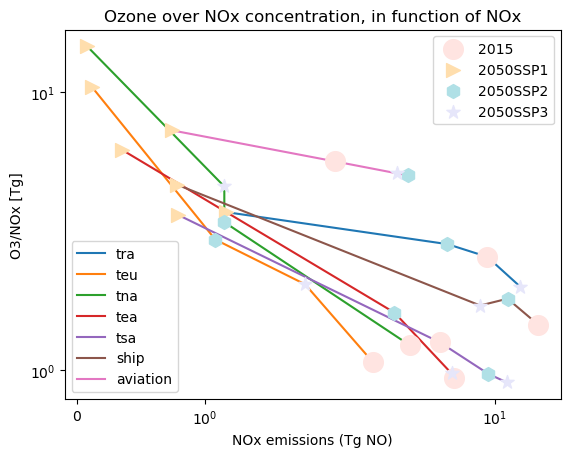

In [12]:
fig, ax = plt.subplots()

scatter_2015 = plt.scatter(data_2015['Nox emissions (Tg NO)'], data_2015['O3/NOx [Tg]'], label = '2015', s = 200, color = 'mistyrose', zorder=3)
scatter_2050ssp1 = plt.scatter(data_2050SSP1['Nox emissions (Tg NO)'], data_2050SSP1['O3/NOx [Tg]'], marker = '>', s = 100, color = 'navajowhite', label = '2050SSP1' , zorder=3)
scatter_2050ssp2 = plt.scatter(data_2050SSP2['Nox emissions (Tg NO)'], data_2050SSP2['O3/NOx [Tg]'], marker = "h", s = 100,  color = 'powderblue', label = '2050SSP2', zorder=3 )
scatter_2050ssp3 = plt.scatter(data_2050SSP3['Nox emissions (Tg NO)'], data_2050SSP3['O3/NOx [Tg]'], marker = '*', s = 100,  color = 'lavender', label = '2050SSP3' , zorder=3)

tra, = plt.plot(data_tra['Nox emissions (Tg NO)'], data_tra['O3/NOx [Tg]'], label = 'tra')
teu, = plt.plot(data_teu['Nox emissions (Tg NO)'], data_teu['O3/NOx [Tg]'], label = 'teu' )
tna, = plt.plot(data_tna['Nox emissions (Tg NO)'], data_tna['O3/NOx [Tg]'], label = 'tna' )
tea, = plt.plot(data_tea['Nox emissions (Tg NO)'], data_tea['O3/NOx [Tg]'], label = 'tea' )
tsa, = plt.plot(data_tsa['Nox emissions (Tg NO)'], data_tsa['O3/NOx [Tg]'], label = 'tsa' )
ship, = plt.plot(data_ship['Nox emissions (Tg NO)'], data_ship['O3/NOx [Tg]'], label = 'ship' )
aviation, = plt.plot(data_aviation['Nox emissions (Tg NO)'], data_aviation['O3/NOx [Tg]'], label = 'aviation' )

first_legend = ax.legend(handles=[scatter_2015, scatter_2050ssp1, scatter_2050ssp2, scatter_2050ssp3], loc='upper right')
ax.add_artist(first_legend)
ax.legend(handles=[tra, teu, tna, tea, tsa, ship, aviation], loc='lower left')

plt.ylabel('O3/NOx [Tg]')
plt.xlabel('NOx emissions (Tg NO)')
plt.title('Ozone over NOx concentration, in function of NOx')
plt.xscale('symlog')
plt.yscale('symlog')
plt.show()

### Highlighting only some categories

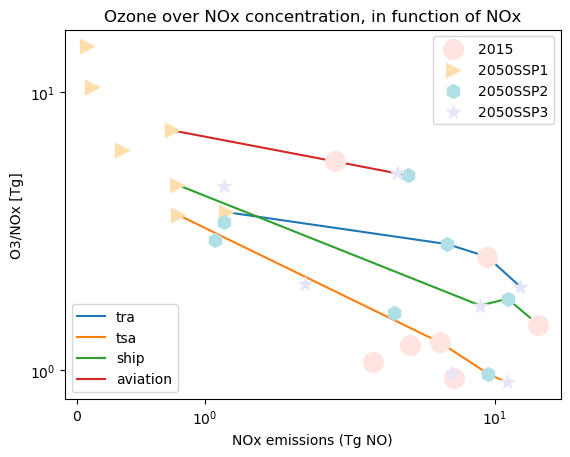

In [13]:
fig, ax = plt.subplots()

scatter_2015 = plt.scatter(data_2015['Nox emissions (Tg NO)'], data_2015['O3/NOx [Tg]'], label = '2015', s = 200, color = 'mistyrose', zorder=3)
scatter_2050ssp1 = plt.scatter(data_2050SSP1['Nox emissions (Tg NO)'], data_2050SSP1['O3/NOx [Tg]'], marker = '>', s = 100, color = 'navajowhite', label = '2050SSP1' , zorder=3)
scatter_2050ssp2 = plt.scatter(data_2050SSP2['Nox emissions (Tg NO)'], data_2050SSP2['O3/NOx [Tg]'], marker = "h", s = 100,  color = 'powderblue', label = '2050SSP2', zorder=3 )
scatter_2050ssp3 = plt.scatter(data_2050SSP3['Nox emissions (Tg NO)'], data_2050SSP3['O3/NOx [Tg]'], marker = '*', s = 100,  color = 'lavender', label = '2050SSP3' , zorder=3)

tra, = plt.plot(data_tra['Nox emissions (Tg NO)'], data_tra['O3/NOx [Tg]'], label = 'tra')
#teu, = plt.plot(data_teu['Nox emissions (Tg NO)'], data_teu['O3/NOx [Tg]'], label = 'teu' )
#tna, = plt.plot(data_tna['Nox emissions (Tg NO)'], data_tna['O3/NOx [Tg]'], label = 'tna' )
#tea, = plt.plot(data_tea['Nox emissions (Tg NO)'], data_tea['O3/NOx [Tg]'], label = 'tea' )
tsa, = plt.plot(data_tsa['Nox emissions (Tg NO)'], data_tsa['O3/NOx [Tg]'], label = 'tsa' )
ship, = plt.plot(data_ship['Nox emissions (Tg NO)'], data_ship['O3/NOx [Tg]'], label = 'ship' )
aviation, = plt.plot(data_aviation['Nox emissions (Tg NO)'], data_aviation['O3/NOx [Tg]'], label = 'aviation' )

first_legend = ax.legend(handles=[scatter_2015, scatter_2050ssp1, scatter_2050ssp2, scatter_2050ssp3], loc='upper right')
ax.add_artist(first_legend)
ax.legend(handles=[tra, tsa, ship, aviation], loc='lower left')

plt.ylabel('O3/NOx [Tg]')
plt.xlabel('NOx emissions (Tg NO)')
plt.title('Ozone over NOx concentration, in function of NOx')
plt.xscale('symlog')
plt.yscale('symlog')
plt.show()

### PLaying around with the sizes of the markers

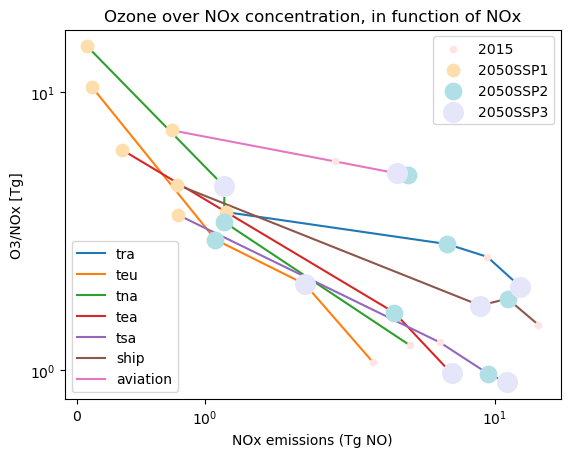

In [14]:
fig, ax = plt.subplots()

scatter_2015 = plt.scatter(data_2015['Nox emissions (Tg NO)'], data_2015['O3/NOx [Tg]'], label = '2015', s = 20, color = 'mistyrose', zorder=3)
scatter_2050ssp1 = plt.scatter(data_2050SSP1['Nox emissions (Tg NO)'], data_2050SSP1['O3/NOx [Tg]'], s = 80, color = 'navajowhite', label = '2050SSP1' , zorder=3)
scatter_2050ssp2 = plt.scatter(data_2050SSP2['Nox emissions (Tg NO)'], data_2050SSP2['O3/NOx [Tg]'],  s = 140,  color = 'powderblue', label = '2050SSP2', zorder=3 )
scatter_2050ssp3 = plt.scatter(data_2050SSP3['Nox emissions (Tg NO)'], data_2050SSP3['O3/NOx [Tg]'],  s = 200,  color = 'lavender', label = '2050SSP3' , zorder=3)

tra, = plt.plot(data_tra['Nox emissions (Tg NO)'], data_tra['O3/NOx [Tg]'], label = 'tra')
teu, = plt.plot(data_teu['Nox emissions (Tg NO)'], data_teu['O3/NOx [Tg]'], label = 'teu' )
tna, = plt.plot(data_tna['Nox emissions (Tg NO)'], data_tna['O3/NOx [Tg]'], label = 'tna' )
tea, = plt.plot(data_tea['Nox emissions (Tg NO)'], data_tea['O3/NOx [Tg]'], label = 'tea' )
tsa, = plt.plot(data_tsa['Nox emissions (Tg NO)'], data_tsa['O3/NOx [Tg]'], label = 'tsa' )
ship, = plt.plot(data_ship['Nox emissions (Tg NO)'], data_ship['O3/NOx [Tg]'], label = 'ship' )
aviation, = plt.plot(data_aviation['Nox emissions (Tg NO)'], data_aviation['O3/NOx [Tg]'], label = 'aviation' )

first_legend = ax.legend(handles=[scatter_2015, scatter_2050ssp1, scatter_2050ssp2, scatter_2050ssp3], loc='upper right')
ax.add_artist(first_legend)
ax.legend(handles=[tra, teu, tna, tea, tsa, ship, aviation], loc='lower left')

plt.ylabel('O3/NOx [Tg]')
plt.xlabel('NOx emissions (Tg NO)')
plt.title('Ozone over NOx concentration, in function of NOx')
plt.xscale('symlog')
plt.yscale('symlog')
plt.show()

### With the scenarios's names

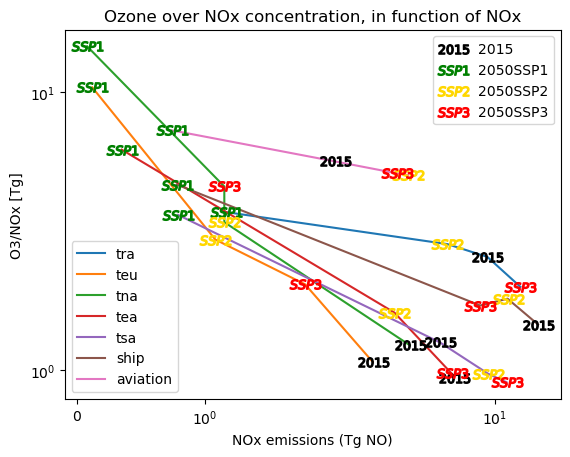

In [15]:
fig, ax = plt.subplots()

scatter_2015 = plt.scatter(data_2015['Nox emissions (Tg NO)'], data_2015['O3/NOx [Tg]'], label = '2015', s = 500, marker = r'$2015$', color = 'black', zorder=3)
scatter_2050ssp1 = plt.scatter(data_2050SSP1['Nox emissions (Tg NO)'], data_2050SSP1['O3/NOx [Tg]'], s = 500,marker = r'$SSP1$', color = 'green', label = '2050SSP1' , zorder=3)
scatter_2050ssp2 = plt.scatter(data_2050SSP2['Nox emissions (Tg NO)'], data_2050SSP2['O3/NOx [Tg]'], s = 500,marker = r'$SSP2$', color = 'gold', label = '2050SSP2', zorder=3 )
scatter_2050ssp3 = plt.scatter(data_2050SSP3['Nox emissions (Tg NO)'], data_2050SSP3['O3/NOx [Tg]'], s = 500, marker = r'$SSP3$', color = 'red', label = '2050SSP3', zorder=3 )

tra, = plt.plot(data_tra['Nox emissions (Tg NO)'], data_tra['O3/NOx [Tg]'], label = 'tra')
teu, = plt.plot(data_teu['Nox emissions (Tg NO)'], data_teu['O3/NOx [Tg]'], label = 'teu' )
tna, = plt.plot(data_tna['Nox emissions (Tg NO)'], data_tna['O3/NOx [Tg]'], label = 'tna' )
tea, = plt.plot(data_tea['Nox emissions (Tg NO)'], data_tea['O3/NOx [Tg]'], label = 'tea' )
tsa, = plt.plot(data_tsa['Nox emissions (Tg NO)'], data_tsa['O3/NOx [Tg]'], label = 'tsa' )
ship, = plt.plot(data_ship['Nox emissions (Tg NO)'], data_ship['O3/NOx [Tg]'], label = 'ship' )
aviation, = plt.plot(data_aviation['Nox emissions (Tg NO)'], data_aviation['O3/NOx [Tg]'], label = 'aviation' )

first_legend = ax.legend(handles=[scatter_2015, scatter_2050ssp1, scatter_2050ssp2, scatter_2050ssp3], loc='upper right')
ax.add_artist(first_legend)
ax.legend(handles=[tra, teu, tna, tea, tsa, ship, aviation], loc='lower left')

plt.ylabel('O3/NOx [Tg]')
plt.xlabel('NOx emissions (Tg NO)')
plt.title('Ozone over NOx concentration, in function of NOx')
plt.xscale('symlog')
plt.yscale('symlog')
plt.show()

### Changing style of the plots

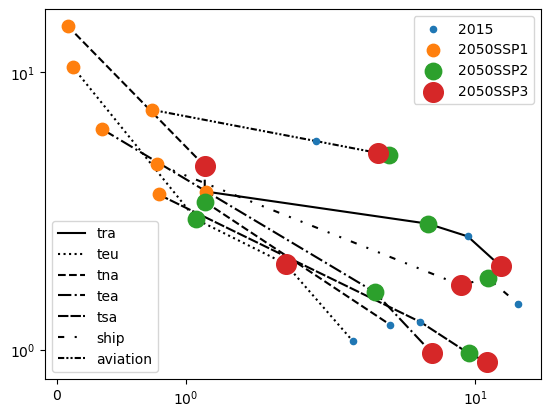

In [16]:
fig, ax = plt.subplots()

scatter_2015 = plt.scatter(data_2015['Nox emissions (Tg NO)'], data_2015['O3/NOx [Tg]'], label = '2015', s = 20, zorder=3)
scatter_2050ssp1 = plt.scatter(data_2050SSP1['Nox emissions (Tg NO)'], data_2050SSP1['O3/NOx [Tg]'], s = 80, label = '2050SSP1' , zorder=3)
scatter_2050ssp2 = plt.scatter(data_2050SSP2['Nox emissions (Tg NO)'], data_2050SSP2['O3/NOx [Tg]'], s = 140, label = '2050SSP2', zorder=3 )
scatter_2050ssp3 = plt.scatter(data_2050SSP3['Nox emissions (Tg NO)'], data_2050SSP3['O3/NOx [Tg]'], s = 200, label = '2050SSP3' , zorder=3)

tra, = plt.plot(data_tra['Nox emissions (Tg NO)'], data_tra['O3/NOx [Tg]'], label = 'tra', color = 'black')
teu, = plt.plot(data_teu['Nox emissions (Tg NO)'], data_teu['O3/NOx [Tg]'], label = 'teu', color = 'black', linestyle = 'dotted')
tna, = plt.plot(data_tna['Nox emissions (Tg NO)'], data_tna['O3/NOx [Tg]'], label = 'tna', color = 'black', linestyle = 'dashed')
tea, = plt.plot(data_tea['Nox emissions (Tg NO)'], data_tea['O3/NOx [Tg]'], label = 'tea', color = 'black', linestyle = 'dashdot')
tsa, = plt.plot(data_tsa['Nox emissions (Tg NO)'], data_tsa['O3/NOx [Tg]'], label = 'tsa', color = 'black', linestyle = (0, (5, 1)))
ship, = plt.plot(data_ship['Nox emissions (Tg NO)'], data_ship['O3/NOx [Tg]'], label = 'ship', color = 'black', linestyle = (0, (3, 5, 1, 5, 1, 5)) )
aviation, = plt.plot(data_aviation['Nox emissions (Tg NO)'], data_aviation['O3/NOx [Tg]'], label = 'aviation', color = 'black', linestyle = (0, (3, 1, 1, 1, 1, 1)) )

first_legend = ax.legend(handles=[scatter_2015, scatter_2050ssp1, scatter_2050ssp2, scatter_2050ssp3], loc='upper right')
ax.add_artist(first_legend)
ax.legend(handles=[tra, teu, tna, tea, tsa, ship, aviation], loc='lower left')

plt.xscale('symlog')
plt.yscale('symlog')
plt.show()

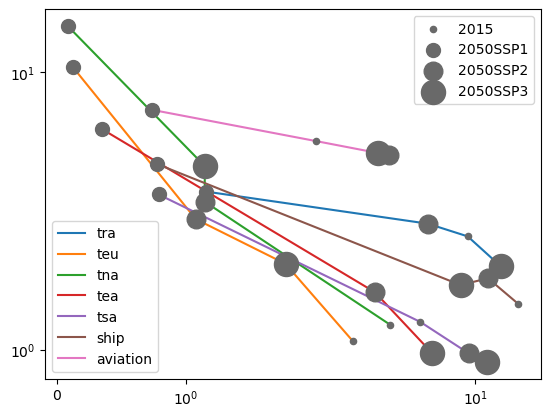

In [144]:
fig, ax = plt.subplots()

scatter_2015 = plt.scatter(data_2015['Nox emissions (Tg NO)'], data_2015['O3/NOx [Tg]'], label = '2015', s = 20, color = 'dimgray', zorder=3)
scatter_2050ssp1 = plt.scatter(data_2050SSP1['Nox emissions (Tg NO)'], data_2050SSP1['O3/NOx [Tg]'], s = 100, color = 'dimgray', label = '2050SSP1' , zorder=3)
scatter_2050ssp2 = plt.scatter(data_2050SSP2['Nox emissions (Tg NO)'], data_2050SSP2['O3/NOx [Tg]'], s = 180,  color = 'dimgray', label = '2050SSP2', zorder=3 )
scatter_2050ssp3 = plt.scatter(data_2050SSP3['Nox emissions (Tg NO)'], data_2050SSP3['O3/NOx [Tg]'], s = 300,  color = 'dimgray', label = '2050SSP3', zorder=3 )

tra, = plt.plot(data_tra['Nox emissions (Tg NO)'], data_tra['O3/NOx [Tg]'], label = 'tra')
teu, = plt.plot(data_teu['Nox emissions (Tg NO)'], data_teu['O3/NOx [Tg]'], label = 'teu' )
tna, = plt.plot(data_tna['Nox emissions (Tg NO)'], data_tna['O3/NOx [Tg]'], label = 'tna' )
tea, = plt.plot(data_tea['Nox emissions (Tg NO)'], data_tea['O3/NOx [Tg]'], label = 'tea' )
tsa, = plt.plot(data_tsa['Nox emissions (Tg NO)'], data_tsa['O3/NOx [Tg]'], label = 'tsa' )
ship, = plt.plot(data_ship['Nox emissions (Tg NO)'], data_ship['O3/NOx [Tg]'], label = 'ship' )
aviation, = plt.plot(data_aviation['Nox emissions (Tg NO)'], data_aviation['O3/NOx [Tg]'], label = 'aviation' )

first_legend = ax.legend(handles=[scatter_2015, scatter_2050ssp1, scatter_2050ssp2, scatter_2050ssp3], loc='upper right')
ax.add_artist(first_legend)
ax.legend(handles=[tra, teu, tna, tea, tsa, ship, aviation], loc='lower left')

plt.xscale('symlog')
plt.yscale('symlog')
plt.show()

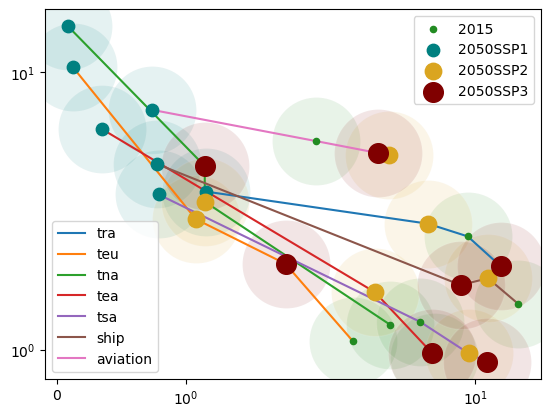

In [136]:
fig, ax = plt.subplots()

plt.scatter(data_2015['Nox emissions (Tg NO)'], data_2015['O3/NOx [Tg]'], s = 4000, color = 'forestgreen', alpha = 0.1, edgecolors='white')
plt.scatter(data_2050SSP1['Nox emissions (Tg NO)'], data_2050SSP1['O3/NOx [Tg]'], s = 4000, color = 'teal', alpha = 0.1, edgecolors='white')
plt.scatter(data_2050SSP2['Nox emissions (Tg NO)'], data_2050SSP2['O3/NOx [Tg]'], s = 4000,  color = 'goldenrod', alpha = 0.1, edgecolors='white')
plt.scatter(data_2050SSP3['Nox emissions (Tg NO)'], data_2050SSP3['O3/NOx [Tg]'], s = 4000,  color = 'maroon', alpha = 0.1, edgecolors='white')

scatter_2015 = plt.scatter(data_2015['Nox emissions (Tg NO)'], data_2015['O3/NOx [Tg]'], label = '2015', s = 20, color = 'forestgreen', zorder=3)
scatter_2050ssp1 = plt.scatter(data_2050SSP1['Nox emissions (Tg NO)'], data_2050SSP1['O3/NOx [Tg]'], s = 80, color = 'teal', label = '2050SSP1', zorder=3)
scatter_2050ssp2 = plt.scatter(data_2050SSP2['Nox emissions (Tg NO)'], data_2050SSP2['O3/NOx [Tg]'], s = 140,  color = 'goldenrod', label = '2050SSP2', zorder=3)
scatter_2050ssp3 = plt.scatter(data_2050SSP3['Nox emissions (Tg NO)'], data_2050SSP3['O3/NOx [Tg]'], s = 200,  color = 'maroon', label = '2050SSP3', zorder=3)


tra, = plt.plot(data_tra['Nox emissions (Tg NO)'], data_tra['O3/NOx [Tg]'], label = 'tra')
teu, = plt.plot(data_teu['Nox emissions (Tg NO)'], data_teu['O3/NOx [Tg]'], label = 'teu' )
tna, = plt.plot(data_tna['Nox emissions (Tg NO)'], data_tna['O3/NOx [Tg]'], label = 'tna' )
tea, = plt.plot(data_tea['Nox emissions (Tg NO)'], data_tea['O3/NOx [Tg]'], label = 'tea' )
tsa, = plt.plot(data_tsa['Nox emissions (Tg NO)'], data_tsa['O3/NOx [Tg]'], label = 'tsa' )
ship, = plt.plot(data_ship['Nox emissions (Tg NO)'], data_ship['O3/NOx [Tg]'], label = 'ship' )
aviation, = plt.plot(data_aviation['Nox emissions (Tg NO)'], data_aviation['O3/NOx [Tg]'], label = 'aviation' )

first_legend = ax.legend(handles=[scatter_2015, scatter_2050ssp1, scatter_2050ssp2, scatter_2050ssp3], loc='upper right')
ax.add_artist(first_legend)
ax.legend(handles=[tra, teu, tna, tea, tsa, ship, aviation], loc='lower left')

plt.xscale('symlog')
plt.yscale('symlog')
plt.show()

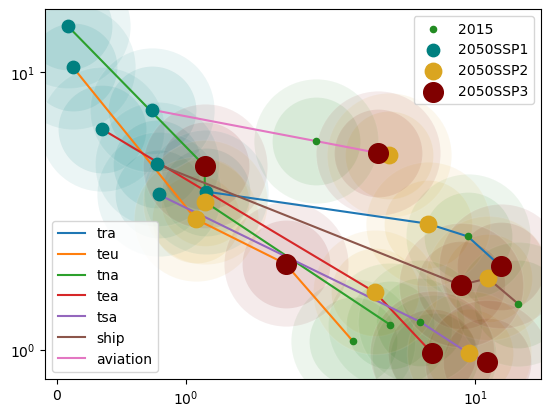

In [143]:
'rgba(255,0,255, 0.4)'
fig, ax = plt.subplots()

plt.scatter(data_2015['Nox emissions (Tg NO)'], data_2015['O3/NOx [Tg]'], s = 4000, color = 'forestgreen', alpha = 0.1, edgecolors='white')
plt.scatter(data_2050SSP1['Nox emissions (Tg NO)'], data_2050SSP1['O3/NOx [Tg]'], s = 4000, color = 'teal', alpha = 0.1, edgecolors='white')
plt.scatter(data_2050SSP2['Nox emissions (Tg NO)'], data_2050SSP2['O3/NOx [Tg]'], s = 4000,  color = 'goldenrod', alpha = 0.1, edgecolors='white')
plt.scatter(data_2050SSP3['Nox emissions (Tg NO)'], data_2050SSP3['O3/NOx [Tg]'], s = 4000,  color = 'maroon', alpha = 0.1, edgecolors='white')

plt.scatter(data_2015['Nox emissions (Tg NO)'], data_2015['O3/NOx [Tg]'], s = 8000, color = 'forestgreen', alpha = 0.08, edgecolors='white')
plt.scatter(data_2050SSP1['Nox emissions (Tg NO)'], data_2050SSP1['O3/NOx [Tg]'], s = 8000, color = 'teal', alpha = 0.08, edgecolors='white')
plt.scatter(data_2050SSP2['Nox emissions (Tg NO)'], data_2050SSP2['O3/NOx [Tg]'], s = 8000,  color = 'goldenrod', alpha = 0.08, edgecolors='white')
plt.scatter(data_2050SSP3['Nox emissions (Tg NO)'], data_2050SSP3['O3/NOx [Tg]'], s = 8000,  color = 'maroon', alpha = 0.08, edgecolors='white')

scatter_2015 = plt.scatter(data_2015['Nox emissions (Tg NO)'], data_2015['O3/NOx [Tg]'], label = '2015', s = 20, color = 'forestgreen', zorder=3)
scatter_2050ssp1 = plt.scatter(data_2050SSP1['Nox emissions (Tg NO)'], data_2050SSP1['O3/NOx [Tg]'], s = 80, color = 'teal', label = '2050SSP1', zorder=3)
scatter_2050ssp2 = plt.scatter(data_2050SSP2['Nox emissions (Tg NO)'], data_2050SSP2['O3/NOx [Tg]'], s = 140,  color = 'goldenrod', label = '2050SSP2', zorder=3)
scatter_2050ssp3 = plt.scatter(data_2050SSP3['Nox emissions (Tg NO)'], data_2050SSP3['O3/NOx [Tg]'], s = 200,  color = 'maroon', label = '2050SSP3', zorder=3)


tra, = plt.plot(data_tra['Nox emissions (Tg NO)'], data_tra['O3/NOx [Tg]'], label = 'tra')
teu, = plt.plot(data_teu['Nox emissions (Tg NO)'], data_teu['O3/NOx [Tg]'], label = 'teu' )
tna, = plt.plot(data_tna['Nox emissions (Tg NO)'], data_tna['O3/NOx [Tg]'], label = 'tna' )
tea, = plt.plot(data_tea['Nox emissions (Tg NO)'], data_tea['O3/NOx [Tg]'], label = 'tea' )
tsa, = plt.plot(data_tsa['Nox emissions (Tg NO)'], data_tsa['O3/NOx [Tg]'], label = 'tsa' )
ship, = plt.plot(data_ship['Nox emissions (Tg NO)'], data_ship['O3/NOx [Tg]'], label = 'ship' )
aviation, = plt.plot(data_aviation['Nox emissions (Tg NO)'], data_aviation['O3/NOx [Tg]'], label = 'aviation' )

first_legend = ax.legend(handles=[scatter_2015, scatter_2050ssp1, scatter_2050ssp2, scatter_2050ssp3], loc='upper right')
ax.add_artist(first_legend)
ax.legend(handles=[tra, teu, tna, tea, tsa, ship, aviation], loc='lower left')

plt.xscale('symlog')
plt.yscale('symlog')
plt.show()

### Bad Plots

In [156]:
data_tra_o = unpack_category_data(data, 'tra')
data_teu_o = unpack_category_data(data, 'teu')
data_tna_o = unpack_category_data(data, 'tna')
data_tea_o = unpack_category_data(data, 'tea')
data_tsa_o = unpack_category_data(data, 'tsa')
data_ship_o = unpack_category_data(data, 'ship')
data_aviation_o = unpack_category_data(data, 'aviation')

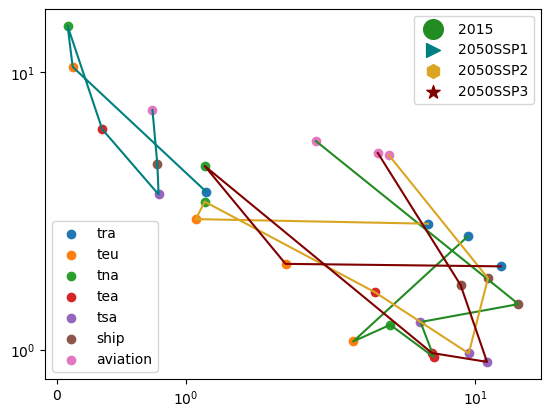

In [161]:
fig, ax = plt.subplots()

plot_2015, = plt.plot(data_2015['Nox emissions (Tg NO)'], data_2015['O3/NOx [Tg]'], label = '2015', color = 'forestgreen')
plot_2050ssp1, = plt.plot(data_2050SSP1['Nox emissions (Tg NO)'], data_2050SSP1['O3/NOx [Tg]'],  color = 'teal', label = '2050SSP1' )
plot_2050ssp2, = plt.plot(data_2050SSP2['Nox emissions (Tg NO)'], data_2050SSP2['O3/NOx [Tg]'],  color = 'goldenrod', label = '2050SSP2')
plot_2050ssp3, = plt.plot(data_2050SSP3['Nox emissions (Tg NO)'], data_2050SSP3['O3/NOx [Tg]'], color = 'maroon', label = '2050SSP3')

tra = plt.scatter(data_tra_o['Nox emissions (Tg NO)'], data_tra_o['O3/NOx [Tg]'], label = 'tra')
teu = plt.scatter(data_teu_o['Nox emissions (Tg NO)'], data_teu_o['O3/NOx [Tg]'], label = 'teu' )
tna = plt.scatter(data_tna_o['Nox emissions (Tg NO)'], data_tna_o['O3/NOx [Tg]'], label = 'tna' )
tea = plt.scatter(data_tea_o['Nox emissions (Tg NO)'], data_tea_o['O3/NOx [Tg]'], label = 'tea' )
tsa = plt.scatter(data_tsa_o['Nox emissions (Tg NO)'], data_tsa_o['O3/NOx [Tg]'], label = 'tsa' )
ship = plt.scatter(data_ship_o['Nox emissions (Tg NO)'], data_ship_o['O3/NOx [Tg]'], label = 'ship' )
aviation = plt.scatter(data_aviation_o['Nox emissions (Tg NO)'], data_aviation_o['O3/NOx [Tg]'], label = 'aviation' )

first_legend = ax.legend(handles=[scatter_2015, scatter_2050ssp1, scatter_2050ssp2, scatter_2050ssp3], loc='upper right')
ax.add_artist(first_legend)
ax.legend(handles=[tra, teu, tna, tea, tsa, ship, aviation], loc='lower left')

plt.xscale('symlog')
plt.yscale('symlog')
plt.show()

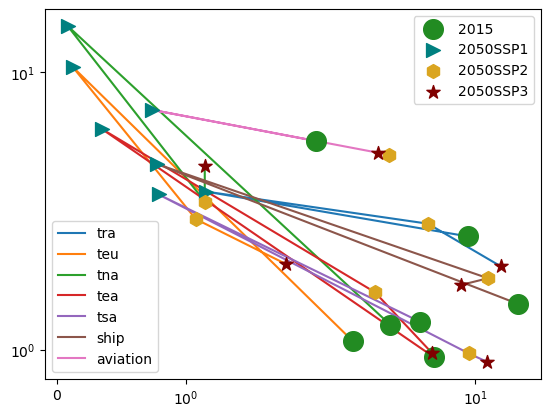

In [170]:
fig, ax = plt.subplots()

scatter_2015 = plt.scatter(data_2015['Nox emissions (Tg NO)'], data_2015['O3/NOx [Tg]'], label = '2015', s = 200, color = 'forestgreen', zorder=3)
scatter_2050ssp1 = plt.scatter(data_2050SSP1['Nox emissions (Tg NO)'], data_2050SSP1['O3/NOx [Tg]'], marker = '>', s = 100, color = 'teal', label = '2050SSP1' , zorder=3)
scatter_2050ssp2 = plt.scatter(data_2050SSP2['Nox emissions (Tg NO)'], data_2050SSP2['O3/NOx [Tg]'], marker = "h", s = 100,  color = 'goldenrod', label = '2050SSP2', zorder=3 )
scatter_2050ssp3 = plt.scatter(data_2050SSP3['Nox emissions (Tg NO)'], data_2050SSP3['O3/NOx [Tg]'], marker = '*', s = 100,  color = 'maroon', label = '2050SSP3' , zorder=3)

tra, = plt.plot(data_tra_o['Nox emissions (Tg NO)'], data_tra_o['O3/NOx [Tg]'], label = 'tra')
teu, = plt.plot(data_teu_o['Nox emissions (Tg NO)'], data_teu_o['O3/NOx [Tg]'], label = 'teu' )
tna, = plt.plot(data_tna_o['Nox emissions (Tg NO)'], data_tna_o['O3/NOx [Tg]'], label = 'tna' )
tea, = plt.plot(data_tea_o['Nox emissions (Tg NO)'], data_tea_o['O3/NOx [Tg]'], label = 'tea' )
tsa, = plt.plot(data_tsa_o['Nox emissions (Tg NO)'], data_tsa_o['O3/NOx [Tg]'], label = 'tsa' )
ship, = plt.plot(data_ship_o['Nox emissions (Tg NO)'], data_ship_o['O3/NOx [Tg]'], label = 'ship' )
aviation, = plt.plot(data_aviation_o['Nox emissions (Tg NO)'], data_aviation_o['O3/NOx [Tg]'], label = 'aviation' )

first_legend = ax.legend(handles=[scatter_2015, scatter_2050ssp1, scatter_2050ssp2, scatter_2050ssp3], loc='upper right')
ax.add_artist(first_legend)
ax.legend(handles=[tra, teu, tna, tea, tsa, ship, aviation], loc='lower left')

plt.xscale('symlog')
plt.yscale('symlog')
plt.show()